In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
from clustering.fuzzy_c_mean.fuzzy import run_fuzzy_c_means
from clustering.k_mean_plus_mhho.kmean import run_kmean_mhho
from tsp.ahaco.ahaco import run_ahaco
from tsp.ahaco.ahaco import process_violation

In [2]:
input_path_file = "data\Big_Dataset\Li_32\Li-32.csv"

In [3]:
dataframe = pd.read_csv(input_path_file)
data = dataframe.to_numpy()

In [4]:
vehicle_num = 11
vehicle_capacity = 2500
depot = np.array([0, 0])
violation_penalty_value = 1500

In [5]:
def processing(path: np.ndarray):
    start_index = np.where(path == -1)[0][0]
    return np.roll(path.copy(), -start_index)[1:]

### Fuzzy C Means clustering

In [6]:
fuzzy_cluster_center, fuzzy_distance_data = run_fuzzy_c_means(
        num_cluster=vehicle_num, 
        data=data.copy(), 
        capacity=vehicle_capacity,
        increase_vehicle=False
    )

---------------Starting clustering with 11 vehicles---------------
Finishing clustering with number of vehicles 11


In [9]:
fuzzy_cluster_center

array([[  0.        , 778.13404104, 653.43488636, 385.        ],
       [  1.        , 974.02565986, 697.54492584, 567.        ],
       [  2.        , 472.45983414, 205.50173562, 576.        ],
       [  3.        , 616.07474825, 136.95889955, 583.        ],
       [  4.        , 945.42139299, 275.77710879, 558.        ],
       [  5.        , 719.54858212, 325.27459   , 557.        ],
       [  6.        , 924.93925355, 454.91641479, 584.        ],
       [  7.        , 873.91966055, 183.64579877, 591.        ],
       [  8.        , 931.16485063, 817.81943697, 571.        ],
       [  9.        , 667.70816956, 180.30911651, 574.        ],
       [ 10.        , 916.08437543, 654.06069228, 540.        ],
       [ 11.        , 751.6514683 , 235.69979974, 584.        ],
       [ 12.        , 789.82364977, 165.7452329 , 600.        ],
       [ 13.        , 598.87310084, 216.58413622, 594.        ]])

### TSP With AHACO

In [7]:
fuzzy_tsp_record = ""
fuzzy_total_cost = 0
fuzzy_total_cost_with_violation = 0
fuzzy_best_ant_paths = []
for i in range(len(fuzzy_cluster_center)):
    element = np.where(fuzzy_distance_data[:, 3] == i) ## Get index of all points belong to cluster
    city_index = np.append(element[0], -1)
    space = fuzzy_distance_data[element][:,:2]
    space_with_depot = np.append(space, [depot], axis=0)

    best_ant_path, best_fitness = run_ahaco(space_with_depot)
    # print(f"Route {i} : {best_ant_path} --- {city_index[best_ant_path]}")

    best_ant_path_without_depot = processing(city_index[best_ant_path])

    fuzzy_best_ant_paths.append(
            best_ant_path_without_depot
        )

    violation_rate, best_fitness_with_violation_rate = process_violation(data=fuzzy_distance_data,
                    capacity=vehicle_capacity,
                    fitness=best_fitness,
                    index=i,
                    penalty_value=violation_penalty_value)
    fuzzy_total_cost = fuzzy_total_cost + best_fitness
    fuzzy_total_cost_with_violation = fuzzy_total_cost_with_violation + best_fitness_with_violation_rate
    fuzzy_tsp_record = fuzzy_tsp_record + f"Route {i}: " + str(best_ant_path_without_depot).replace(' [', '').replace('[', '').replace(']', '') + f" Violation rate: {(violation_rate * 100):.2f}%" +"\n"
    pass
fuzzy_tsp_record = fuzzy_tsp_record + f"Total cost : {fuzzy_total_cost:.2f}" + "\n"
fuzzy_tsp_record = fuzzy_tsp_record + f"Total cost with violation : {fuzzy_total_cost_with_violation:.2f}"


In [8]:
fuzzy_sol_data_file = "data\Big_Dataset\Li_32\Li-32_output_new.txt"
with open(fuzzy_sol_data_file, 'w') as f:
    f.write(fuzzy_tsp_record) 

In [9]:
print(fuzzy_tsp_record)

Route 0: 22 69 43 80 28 77 15 89 Violation rate: 123.33
Route 1: 50 84 10 97 65 14 52 25 86 Violation rate: 116.67
Route 2:  17  24 102  23  83   3 100  32   8 101  55 Violation rate: 130.00
Route 3:  7 61 99 39 46 85  9 71 62 11 40 57 18 Violation rate: 210.00
Route 4:  48   0  78  37 107  90   4  45  76   5   2  13 Violation rate: 223.33
Route 5: 51 49 38 27 30 16 26 64 58 94 95 87 74 20 53 67 Violation rate: 290.00
Route 6:  88  44  33  66 105  96  19  91  41  73  31 104 Violation rate: 193.33
Route 7:  12  56  81 106  93  36   6  34  72  47 Violation rate: 176.67
Route 8:  54  75  82  21  60  59 103  63  35  98  42  92 Violation rate: 206.67
Route 9: 108  68  29   1  79  70 Violation rate: 50.00
Total cost : 13684.34
Total cost with violation : 39484.34


### K mean clustering with MHHO

In [10]:
kmean_cluster_center, kmean_distance_data = run_kmean_mhho(
        data=data.copy(),
        num_cluster=vehicle_num,
        vehicle_capacity=vehicle_capacity,
    )

Iteration 0
Update fitness at 0
Update fitness at 1
Update fitness at 5
Update fitness at 7
Update fitness at 13
Process A : 0.10832858085632324
['At iteration 0 the best fitness is 6615128709.947343']
Process B : 0.04196357727050781
Iteration 1
Update fitness at 29
Process A : 0.0955362319946289
['At iteration 1 the best fitness is 6613904446.814045']
Process B : 0.07987737655639648
Iteration 2
Process A : 0.1389472484588623
['At iteration 2 the best fitness is 6613904446.814045']
Process B : 0.04185771942138672
Iteration 3
Process A : 0.13877129554748535
['At iteration 3 the best fitness is 6613904446.814045']
Process B : 0.08990955352783203
Iteration 4
Process A : 0.0877232551574707
['At iteration 4 the best fitness is 6613904446.814045']
Process B : 0.02201986312866211
Iteration 5
Process A : 0.09572887420654297
['At iteration 5 the best fitness is 6613904446.814045']
Process B : 0.044997453689575195
Iteration 6
Update fitness at 0
Process A : 0.14558649063110352
['At iteration 6 t

### TSP With AHACO

In [12]:
kmean_tsp_record = ""
kmean_total_cost = 0
kmean_total_cost_with_violation = 0
kmean_best_ant_paths = []
for i in range(len(kmean_cluster_center)):
    element = np.where(kmean_distance_data[:, 3] == i) ## Get index of all points belong to cluster
    city_index = np.append(element[0], -1)
    space = kmean_distance_data[element][:,:2]
    space_with_depot = np.append(space, [depot], axis=0)

    best_ant_path, best_fitness = run_ahaco(space_with_depot)
    best_ant_path_without_depot = processing(city_index[best_ant_path])
    kmean_best_ant_paths.append(
            best_ant_path_without_depot
        )

    violation_rate, best_fitness_with_violation_rate = process_violation(data=kmean_distance_data,
                    capacity=vehicle_capacity,
                    fitness=best_fitness,
                    index=i,
                    penalty_value=violation_penalty_value)
    kmean_total_cost = kmean_total_cost + best_fitness
    kmean_total_cost_with_violation = kmean_total_cost_with_violation + best_fitness_with_violation_rate
    kmean_tsp_record = kmean_tsp_record + f"Route {i}: " + str(best_ant_path_without_depot).replace(' [', '').replace('[', '').replace(']', '') + f" Violation rate: {(violation_rate * 100):.2f}%" + "\n"
    # pass
kmean_tsp_record = kmean_tsp_record + f"Total cost : {kmean_total_cost:.2f}" + "\n"
kmean_tsp_record = kmean_tsp_record + f"Total cost with violation : {kmean_total_cost_with_violation:.2f}"


In [ ]:
kmean_sol_data_file = "clustering\\fuzzy_c_mean\\kmean_data2.txt"
with open(kmean_sol_data_file, 'w') as f:
    f.write(kmean_tsp_record) 

In [13]:
print(kmean_tsp_record)

Route 0:  11  74  38  92  54 101  66  33  31  28  81  46 Violation rate: 166.67
Route 1: 39 72 34 62 20 49 35 98 83 90 Violation rate: 173.33
Route 2:  64 102  50  77  43  93   6  85   9   7  18 Violation rate: 166.67
Route 3:   1 103  58  71  47  36  91  84  23  17 Violation rate: 163.33
Route 4:   2  99  56  69  44  88   4   5 108  24  79 Violation rate: 190.00
Route 5:  51  29  59  21  32  25  65  41 104  78  89 Violation rate: 163.33
Route 6:  73 105  10  14   8   3  55  82  42  63  95 Violation rate: 173.33
Route 7: 107  45  96  52  86  75  60  26  16  30  27  67 Violation rate: 186.67
Route 8:  48  22  80  15  19  37 100  68  94  57 Violation rate: 160.00
Route 9:  70  76  97   0  12 106  61  87  53  40  13 Violation rate: 176.67
Total cost : 28807.04
Total cost with violation : 39484.34


In [29]:
kmean_distance_data[kmean_best_ant_paths[1]]

array([[875.        , 326.        ,   9.        ,   1.        ,
        209.95126712],
       [977.        , 318.        ,  10.        ,   1.        ,
        201.66608092],
       [878.        , 243.        ,   8.        ,   1.        ,
        130.00919126],
       [918.        , 227.        ,   6.        ,   1.        ,
        104.78364402],
       [986.        , 151.        ,  10.        ,   1.        ,
         65.40386979],
       [955.        ,   6.        ,   6.        ,   1.        ,
        119.90653433],
       [922.        ,  16.        ,   7.        ,   1.        ,
        106.7313228 ],
       [828.        ,  54.        ,   9.        ,   1.        ,
        120.51562   ]])

### Plotting

In [9]:
def plot_points(centroid : np.ndarray, distance_data : np.ndarray, best_ant_paths: list, depot:np.ndarray):
    figure(figsize=(14, 12), dpi=80)
    cluster_color = np.random.rand(centroid.shape[0], 3)
    # Plot depot 
    plt.scatter(depot[0], depot[1], marker="X", c=[[0,0,0]])
    # Plot point  
    for i in range(distance_data.shape[0]):
        data = distance_data[i]
        # print(cluster_color[data[3]])
        plt.scatter(data[0], data[1], marker="o", c = [cluster_color[int(data[3])]])
    # Plot cluster center
    # plt.scatter(centroid[:,1], centroid[:,2], marker="x", c=[[0,0,0]])
    # Plot route
    for i in range(len(best_ant_paths)):
        plt.plot(np.concatenate((np.array([depot[0]]), distance_data[best_ant_paths[i]][:,0], np.array([depot[0]])), axis=0),
                np.concatenate((np.array([depot[1]]), distance_data[best_ant_paths[i]][:,1], np.array([depot[1]])), axis=0))

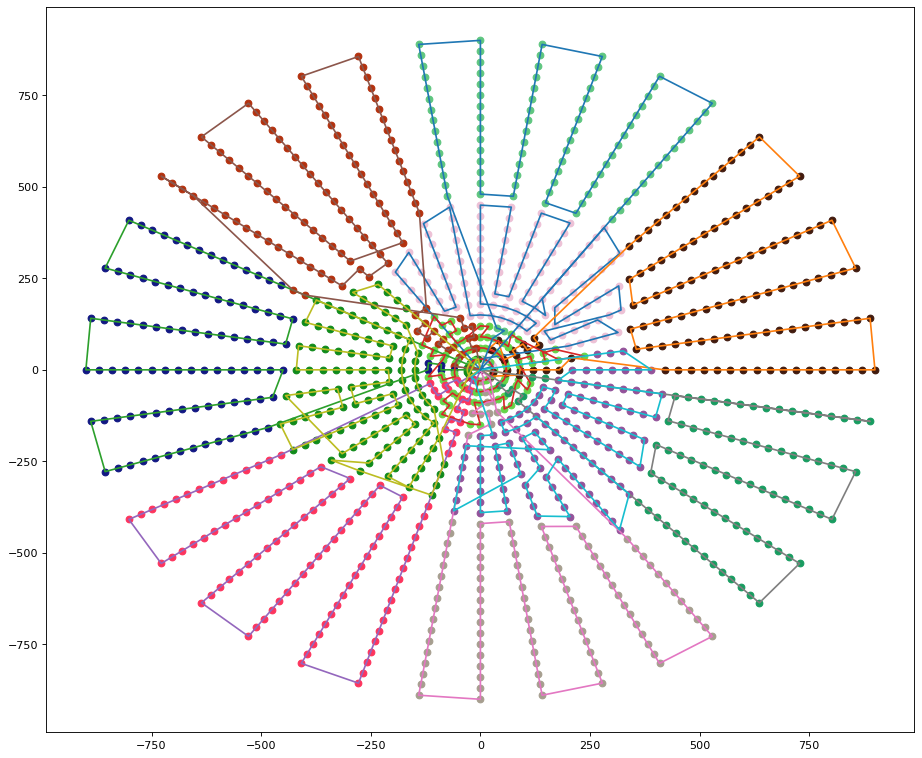

In [10]:
plot_points(fuzzy_cluster_center[:,1:3], fuzzy_distance_data, fuzzy_best_ant_paths, depot)


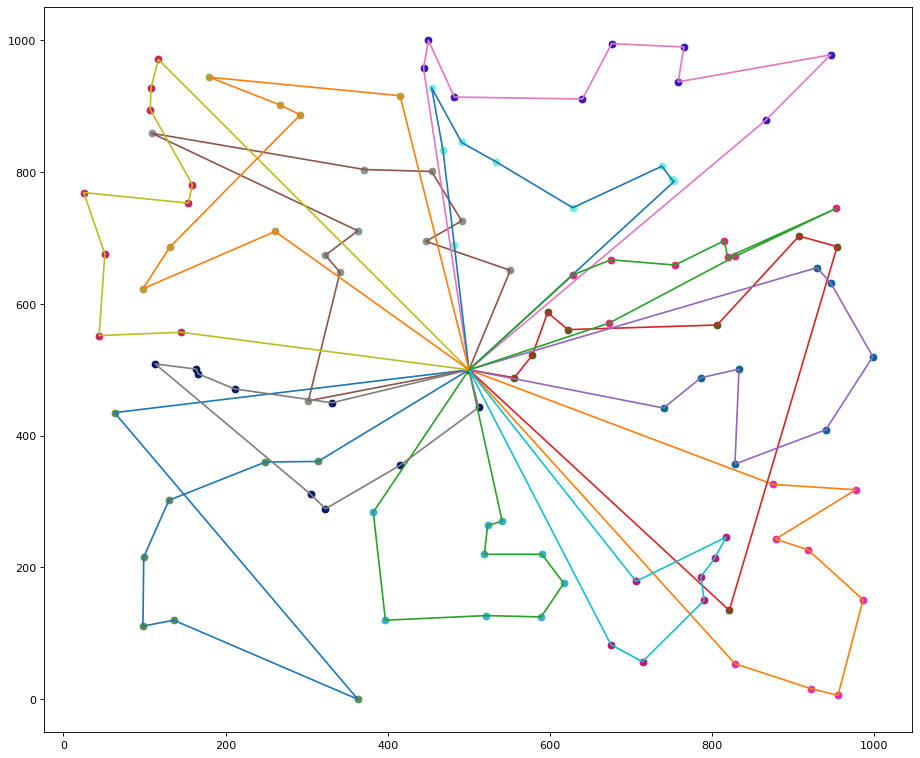

In [43]:
plot_points(kmean_cluster_center, kmean_distance_data, kmean_best_ant_paths, depot)